In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [4]:
price0 = pd.read_csv('R3_day0.csv',delimiter=';')
price1 = pd.read_csv('R3_day1.csv',delimiter=';')
price2 = pd.read_csv('R3_day2.csv',delimiter=';')

In [14]:
combine_df = pd.concat([price0,price1,price2],axis=0).reset_index(drop=True)

In [134]:
choco = combine_df[combine_df['product']=='CHOCOLATE']['mid_price'].reset_index(drop=True)
rose = combine_df[combine_df['product']=='ROSES']['mid_price'].reset_index(drop=True)
strawberry = combine_df[combine_df['product']=='STRAWBERRIES']['mid_price'].reset_index(drop=True)
basket = combine_df[combine_df['product']=='GIFT_BASKET']['mid_price'].reset_index(drop=True)
manual_basket = rose + choco*4 + strawberry*6

In [46]:
X = manual_basket
y = basket
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [63]:
bundle_ts = manual_basket-basket

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
29995    10.586082
29996     9.943922
29997     9.082190
29998     8.653984
29999     8.365027
Name: mid_price, Length: 30000, dtype: float64

In [ ]:
# basket go down > manual go up
# basket go up < manual go down

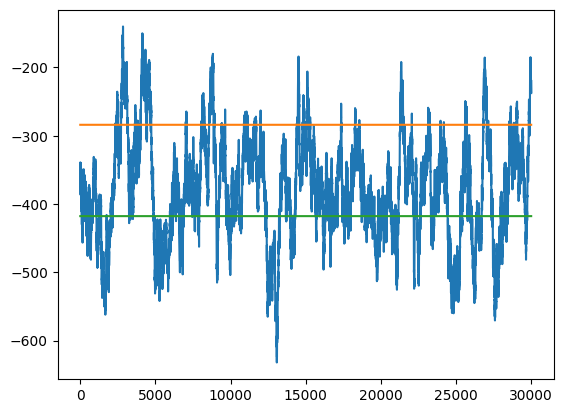

In [156]:
fig, ax1 = plt.subplots()

plt.plot(bundle_ts)
plt.plot(range(30000), [-379.4904833333333+(76.42310842343223*1.25)]*30000)
plt.plot(range(30000), [-379.4904833333333-(76.42310842343223*0.5)]*30000)

In [125]:
buy_sell_bundle_signal = np.where(bundle_ts>-379.4904833333333+(76.42310842343223*0.5),-1,
                             np.where(bundle_ts<-379.4904833333333-(76.42310842343223*0.5),1,0))
buy_bundle_signal = np.where(bundle_ts>-379.4904833333333+(76.42310842343223*0.5),1,0)
sell_bundle_signal = np.where(bundle_ts<-379.4904833333333-(76.42310842343223*0.5),-1,0)

(-1499.95, 31498.95, 69344.5, 71586.5)

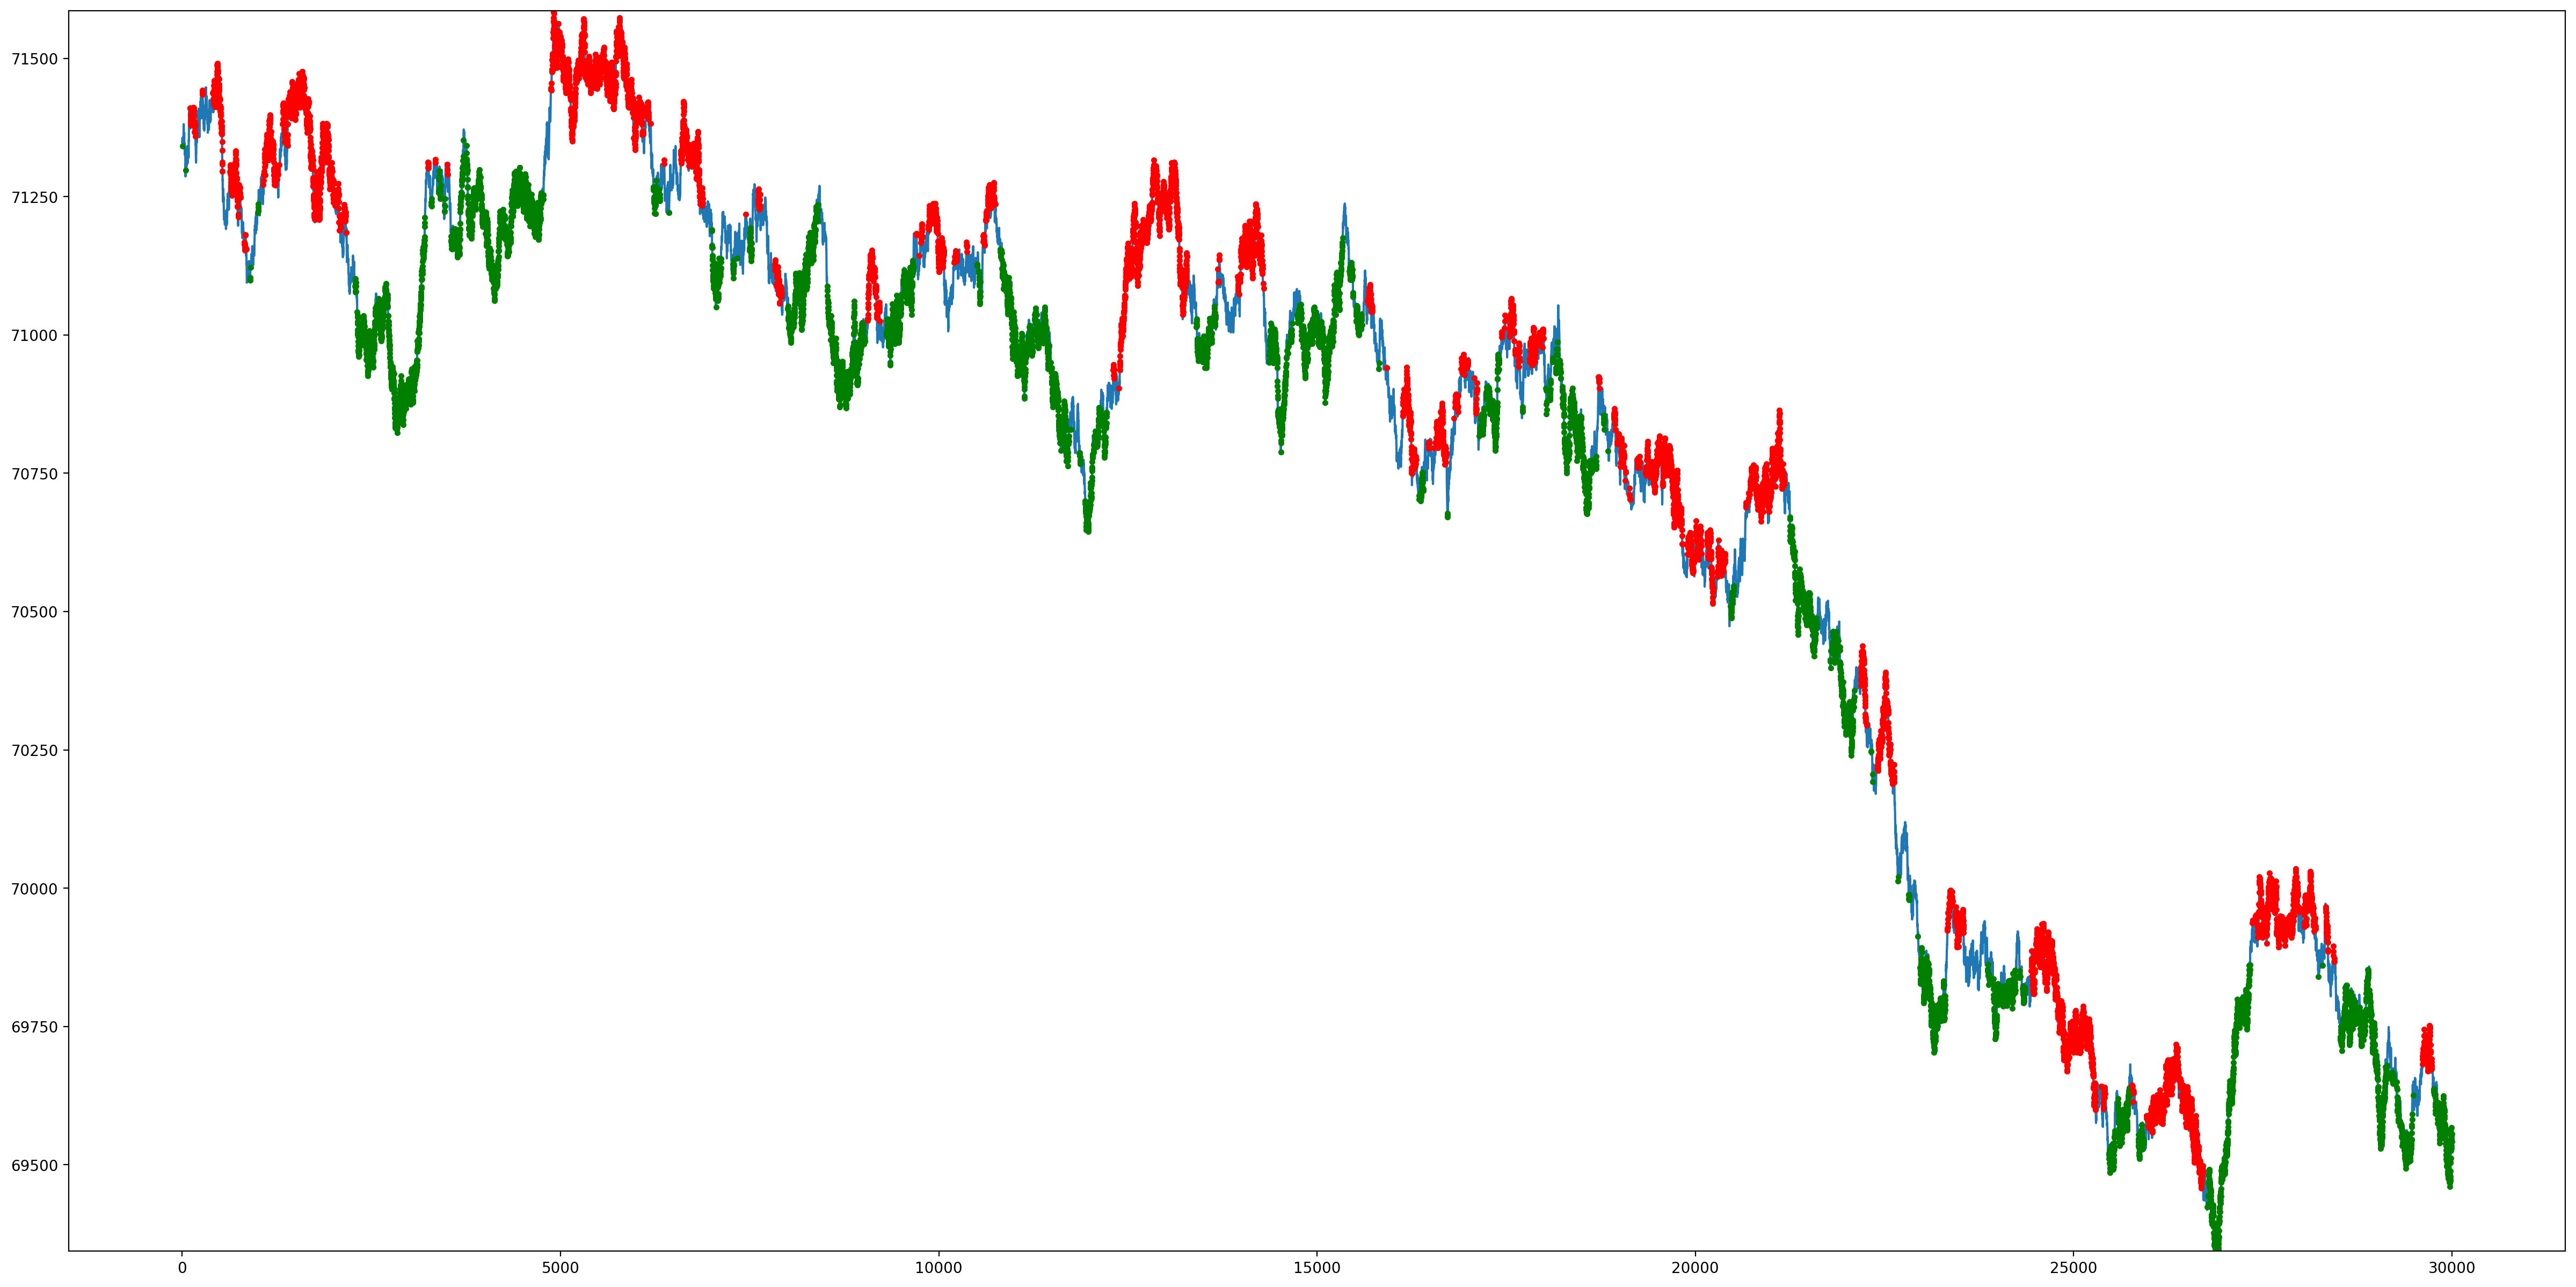

In [141]:
buy_bundle_signal = np.where(bundle_ts>-379.4904833333333+(76.42310842343223*0.5),1,0)
sell_bundle_signal = np.where(bundle_ts<-379.4904833333333-(76.42310842343223*0.5),-1,0)
basket_buy = np.where(buy_bundle_signal==1, basket, 0)
basket_sell = np.where(sell_bundle_signal==-1, basket, 0)

plt.figure(figsize=(30,15),dpi=200)
basket.plot()
pd.Series(basket_buy).plot(color='g',linestyle='None', marker='.')
pd.Series(basket_sell).plot(color='r',linestyle='None', marker='.')
x1,x2,y1,y1 = plt.axis()
plt.axis((x1,x2,basket.min(), basket.max()))

(-499.95000000000005, 10498.95, 69344.5, 71000.0)

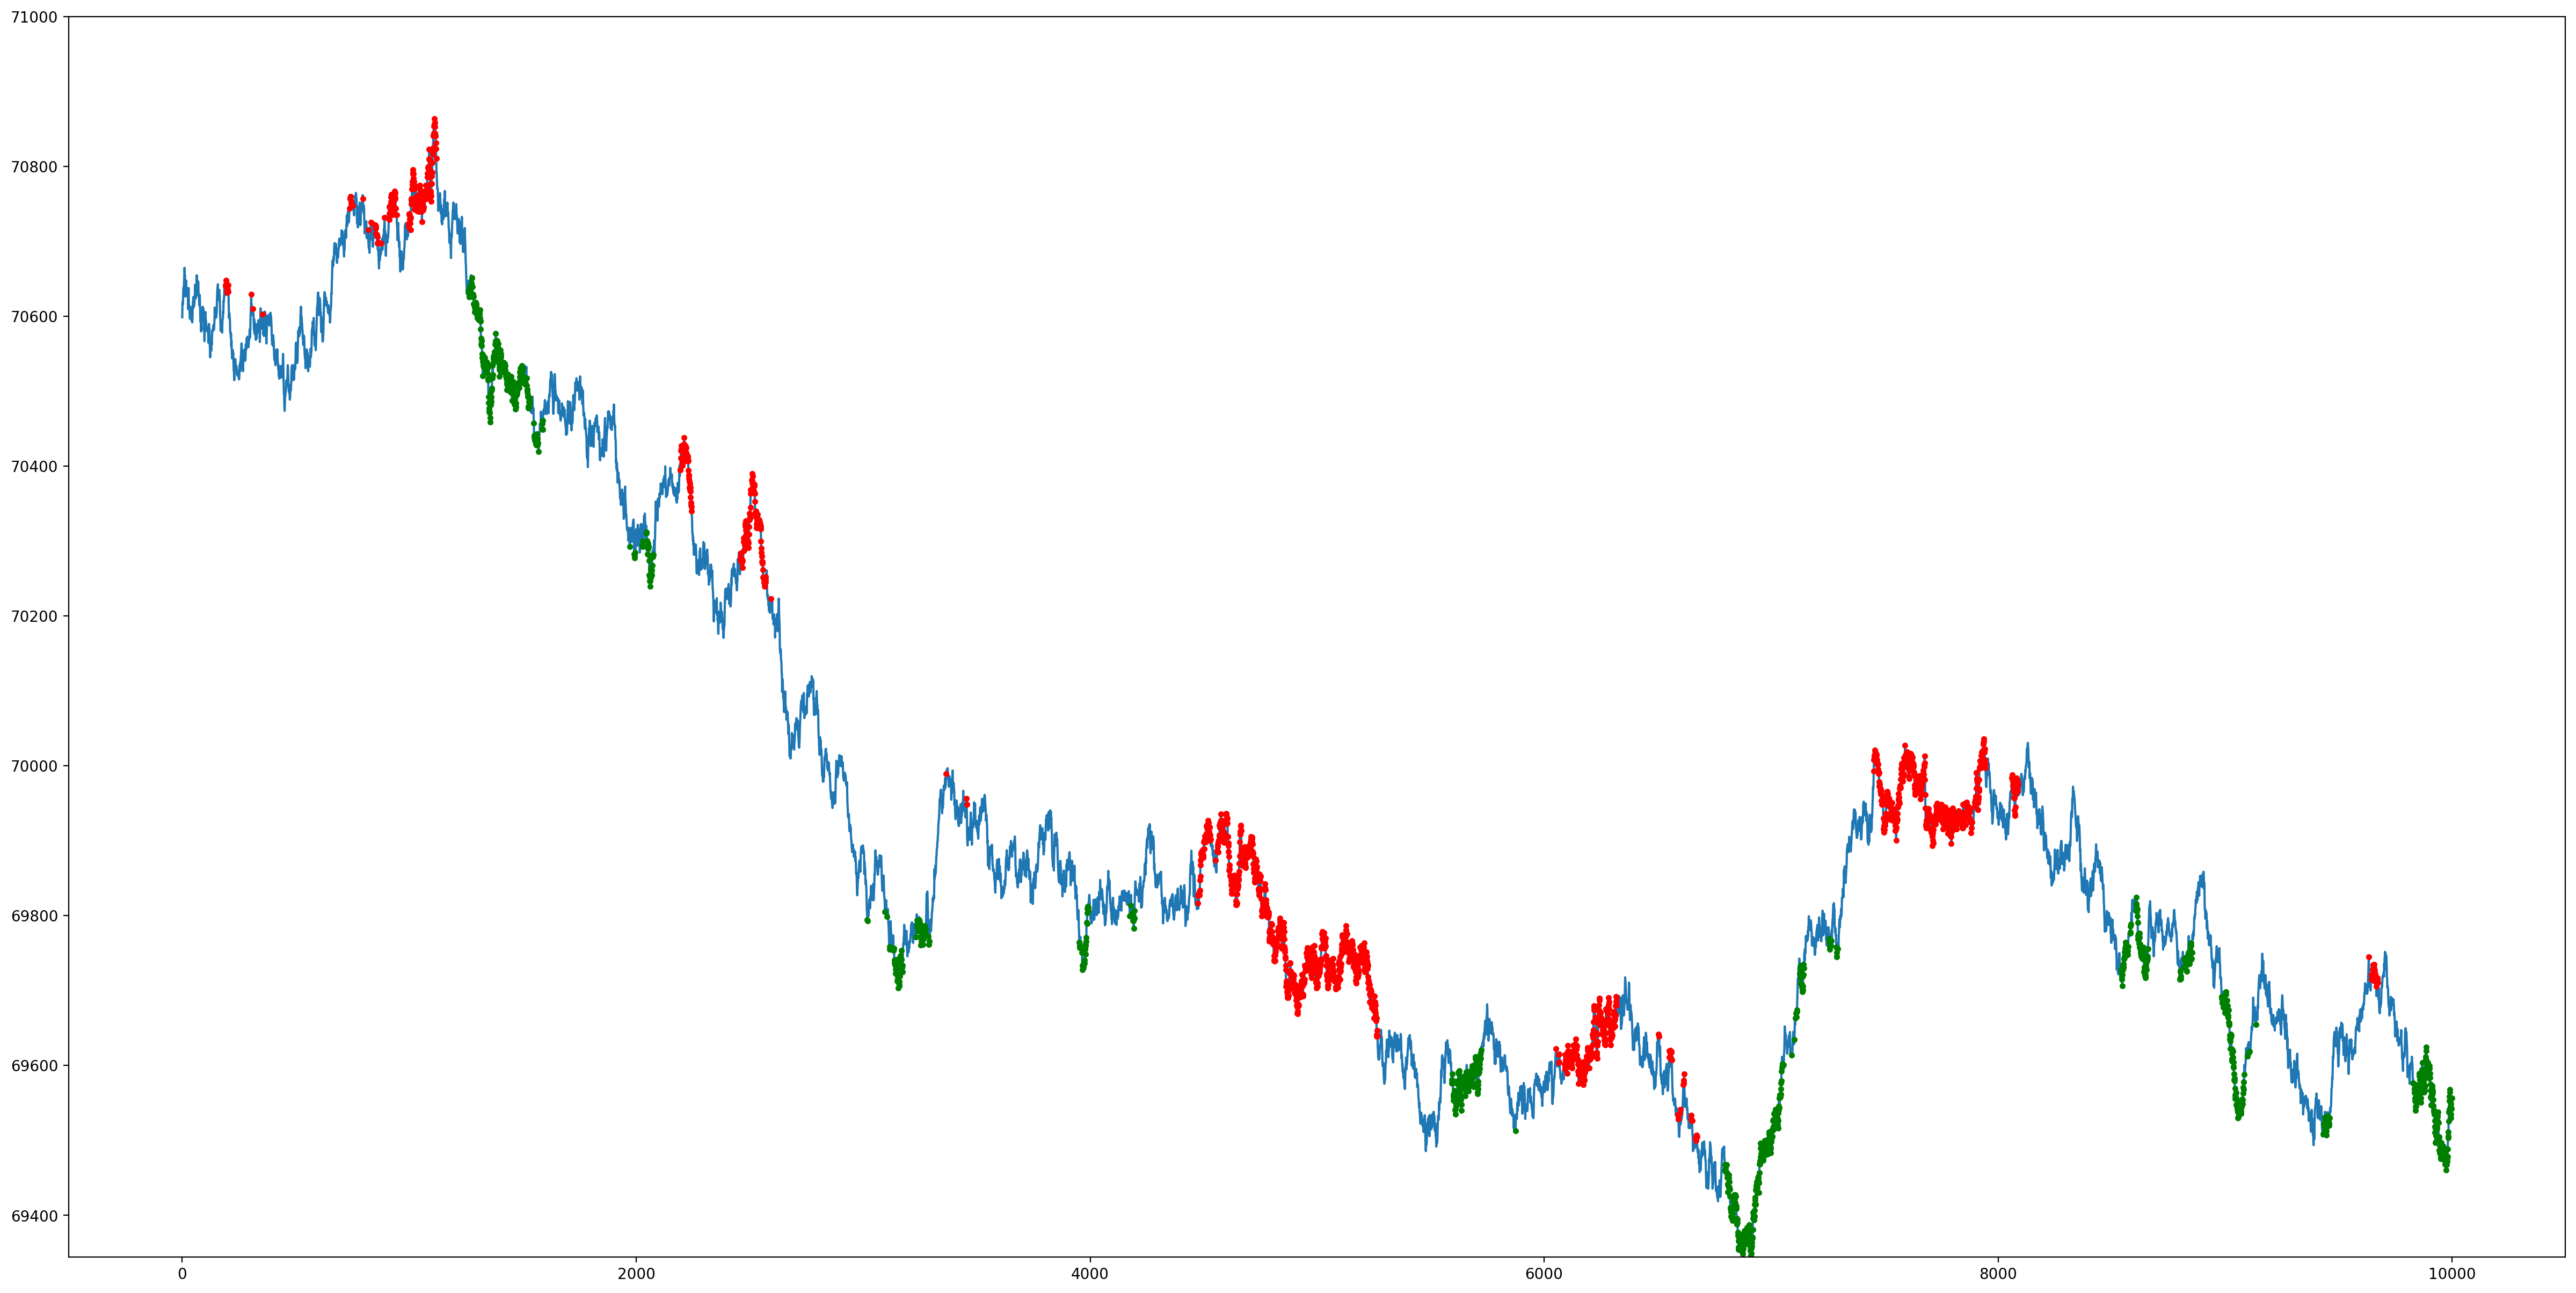

In [195]:
buy_bundle_signal = np.where(bundle_ts>-379.4904833333333+(76.42310842343223*1),1,0)
sell_bundle_signal = np.where(bundle_ts<-379.4904833333333-(76.42310842343223*1),-1,0)
basket_buy = np.where(buy_bundle_signal==1, basket, 0)
basket_sell = np.where(sell_bundle_signal==-1, basket, 0)

plt.figure(figsize=(30,15),dpi=200)
basket[20000:].reset_index(drop=True).plot()
pd.Series(basket_buy[20000:]).plot(color='g',linestyle='None', marker='.')
pd.Series(basket_sell[20000:]).plot(color='r',linestyle='None', marker='.')
x1,x2,y1,y1 = plt.axis()
plt.axis((x1,x2,basket.min(), 71000))

(-1499.95, 31498.95, 3973.0, 4084.0)

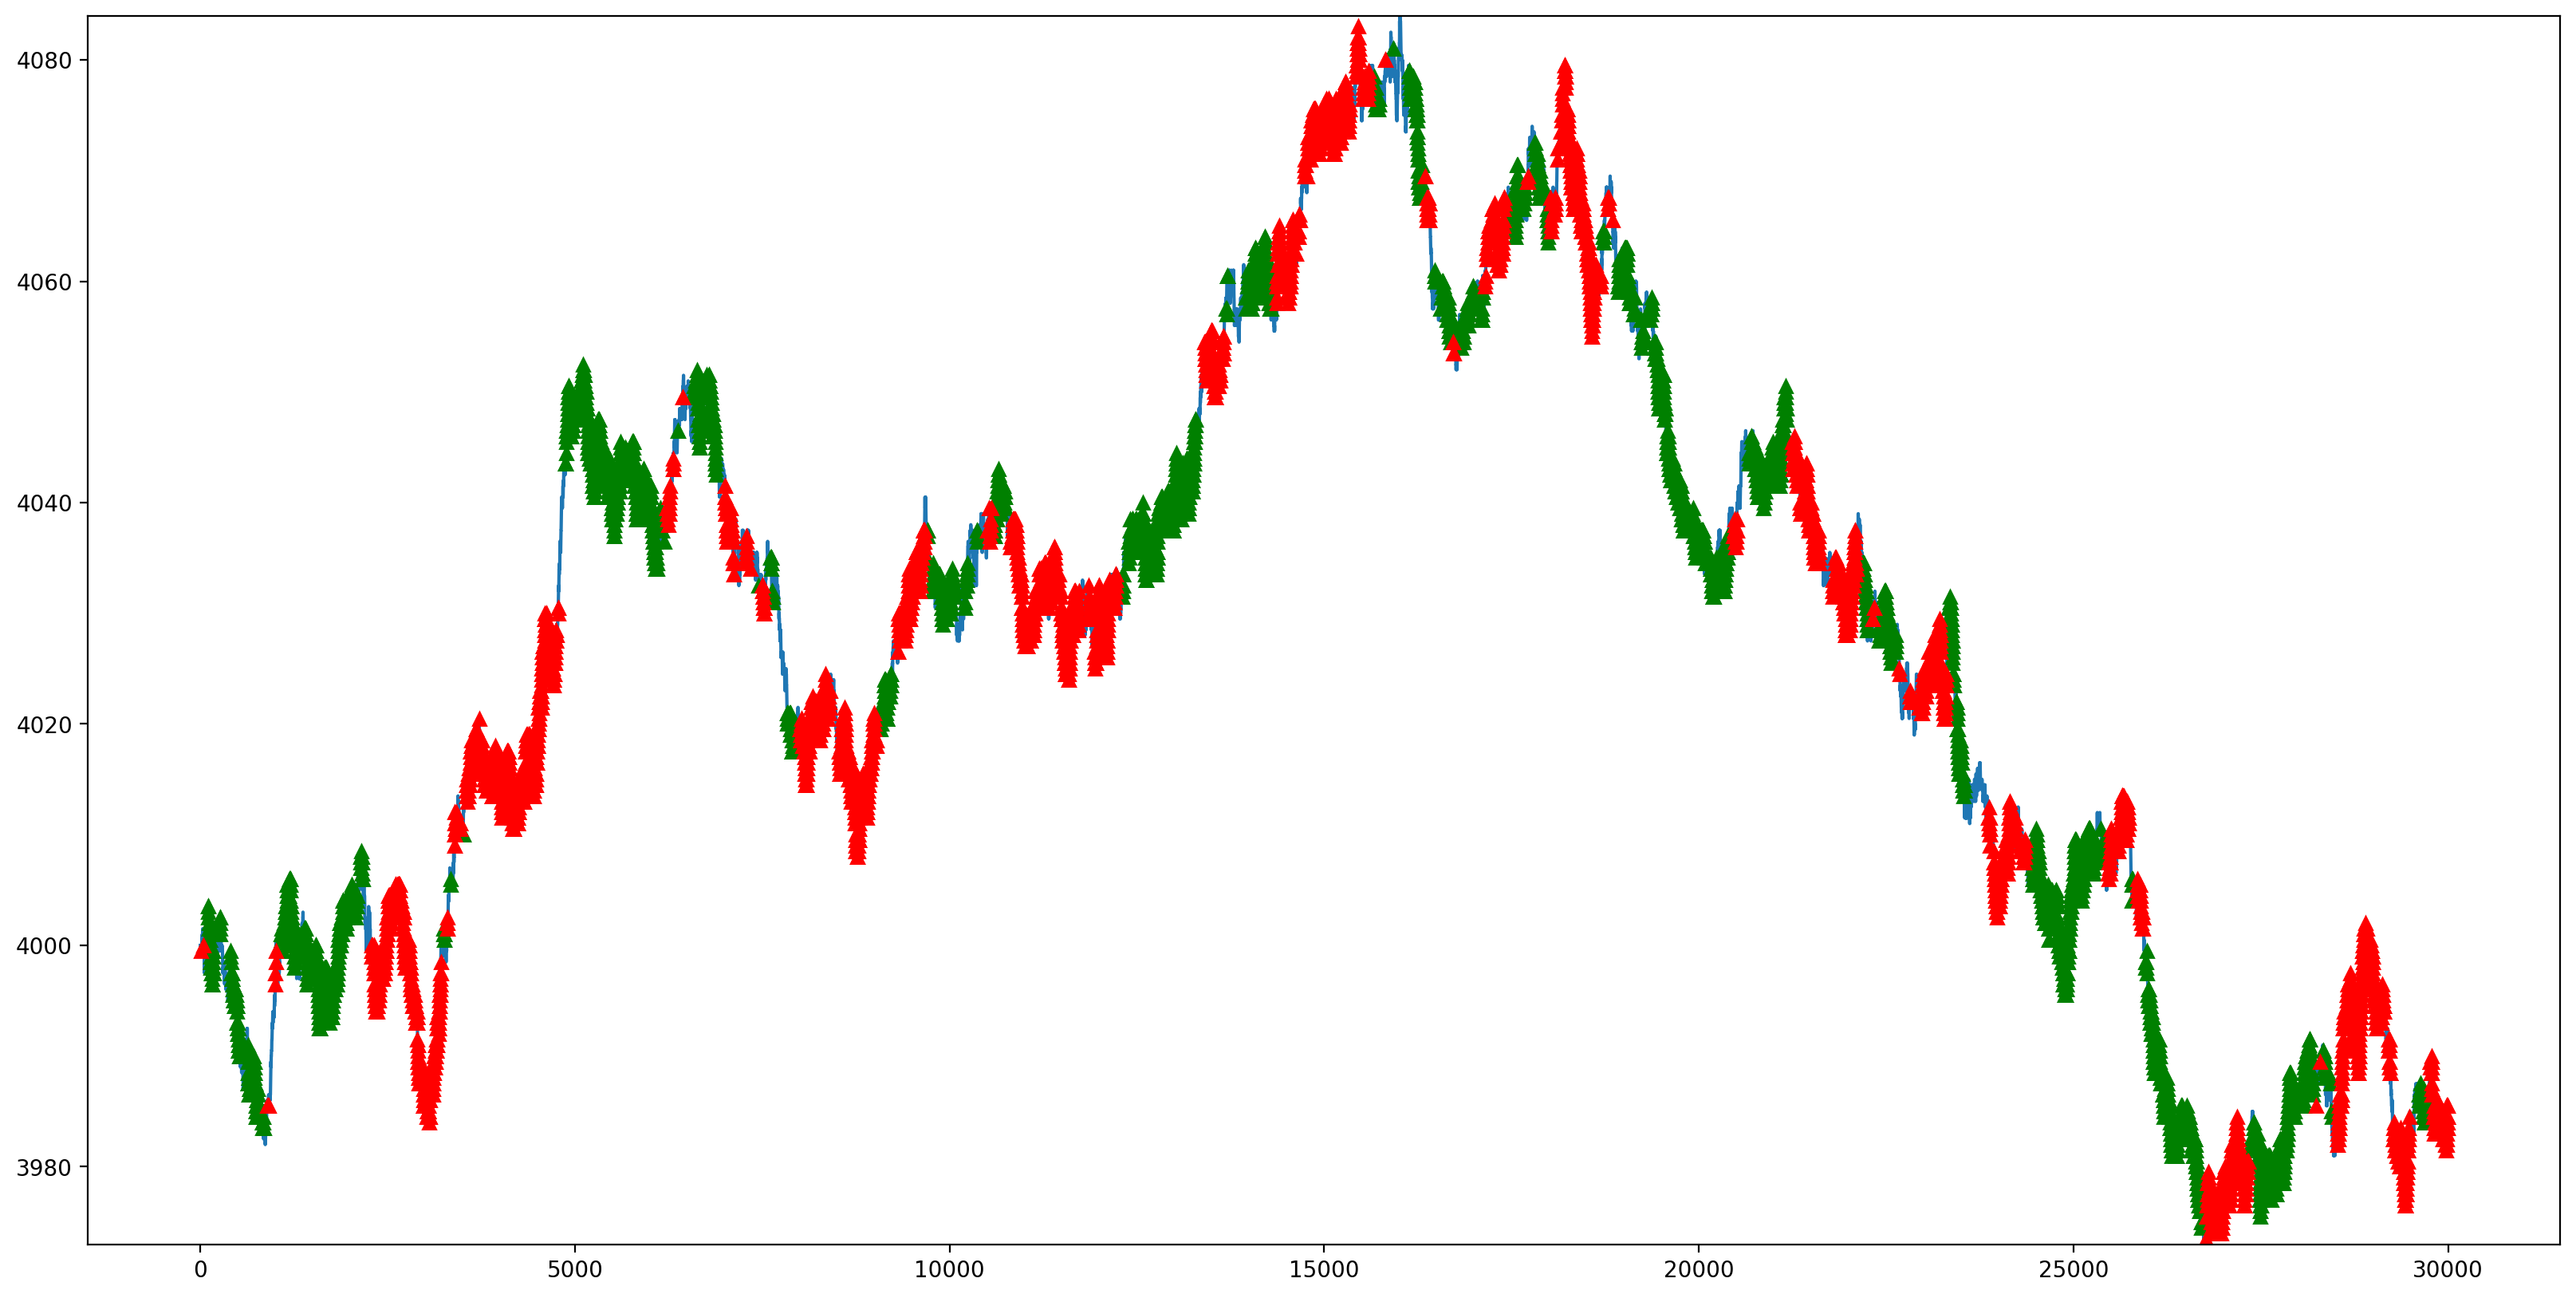

In [199]:
buy_bundle_signal = np.where(bundle_ts>-379.4904833333333+(76.42310842343223*0.5),1,0)
sell_bundle_signal = np.where(bundle_ts<-379.4904833333333-(76.42310842343223*0.5),-1,0)
strawberry_buy = np.where(sell_bundle_signal==-1, strawberry, 0)
strawberry_sell = np.where(buy_bundle_signal==1, strawberry, 0)

plt.figure(figsize=(20,10),dpi=200)
strawberry.plot()
pd.Series(strawberry_buy).plot(color='g',linestyle='None', marker='^')
pd.Series(strawberry_sell).plot(color='r',linestyle='None', marker='^')
x1,x2,y1,y1 = plt.axis()
plt.axis((x1,x2,strawberry.min(), strawberry.max()))

(-1499.95, 31498.95, 14218.0, 15000.5)

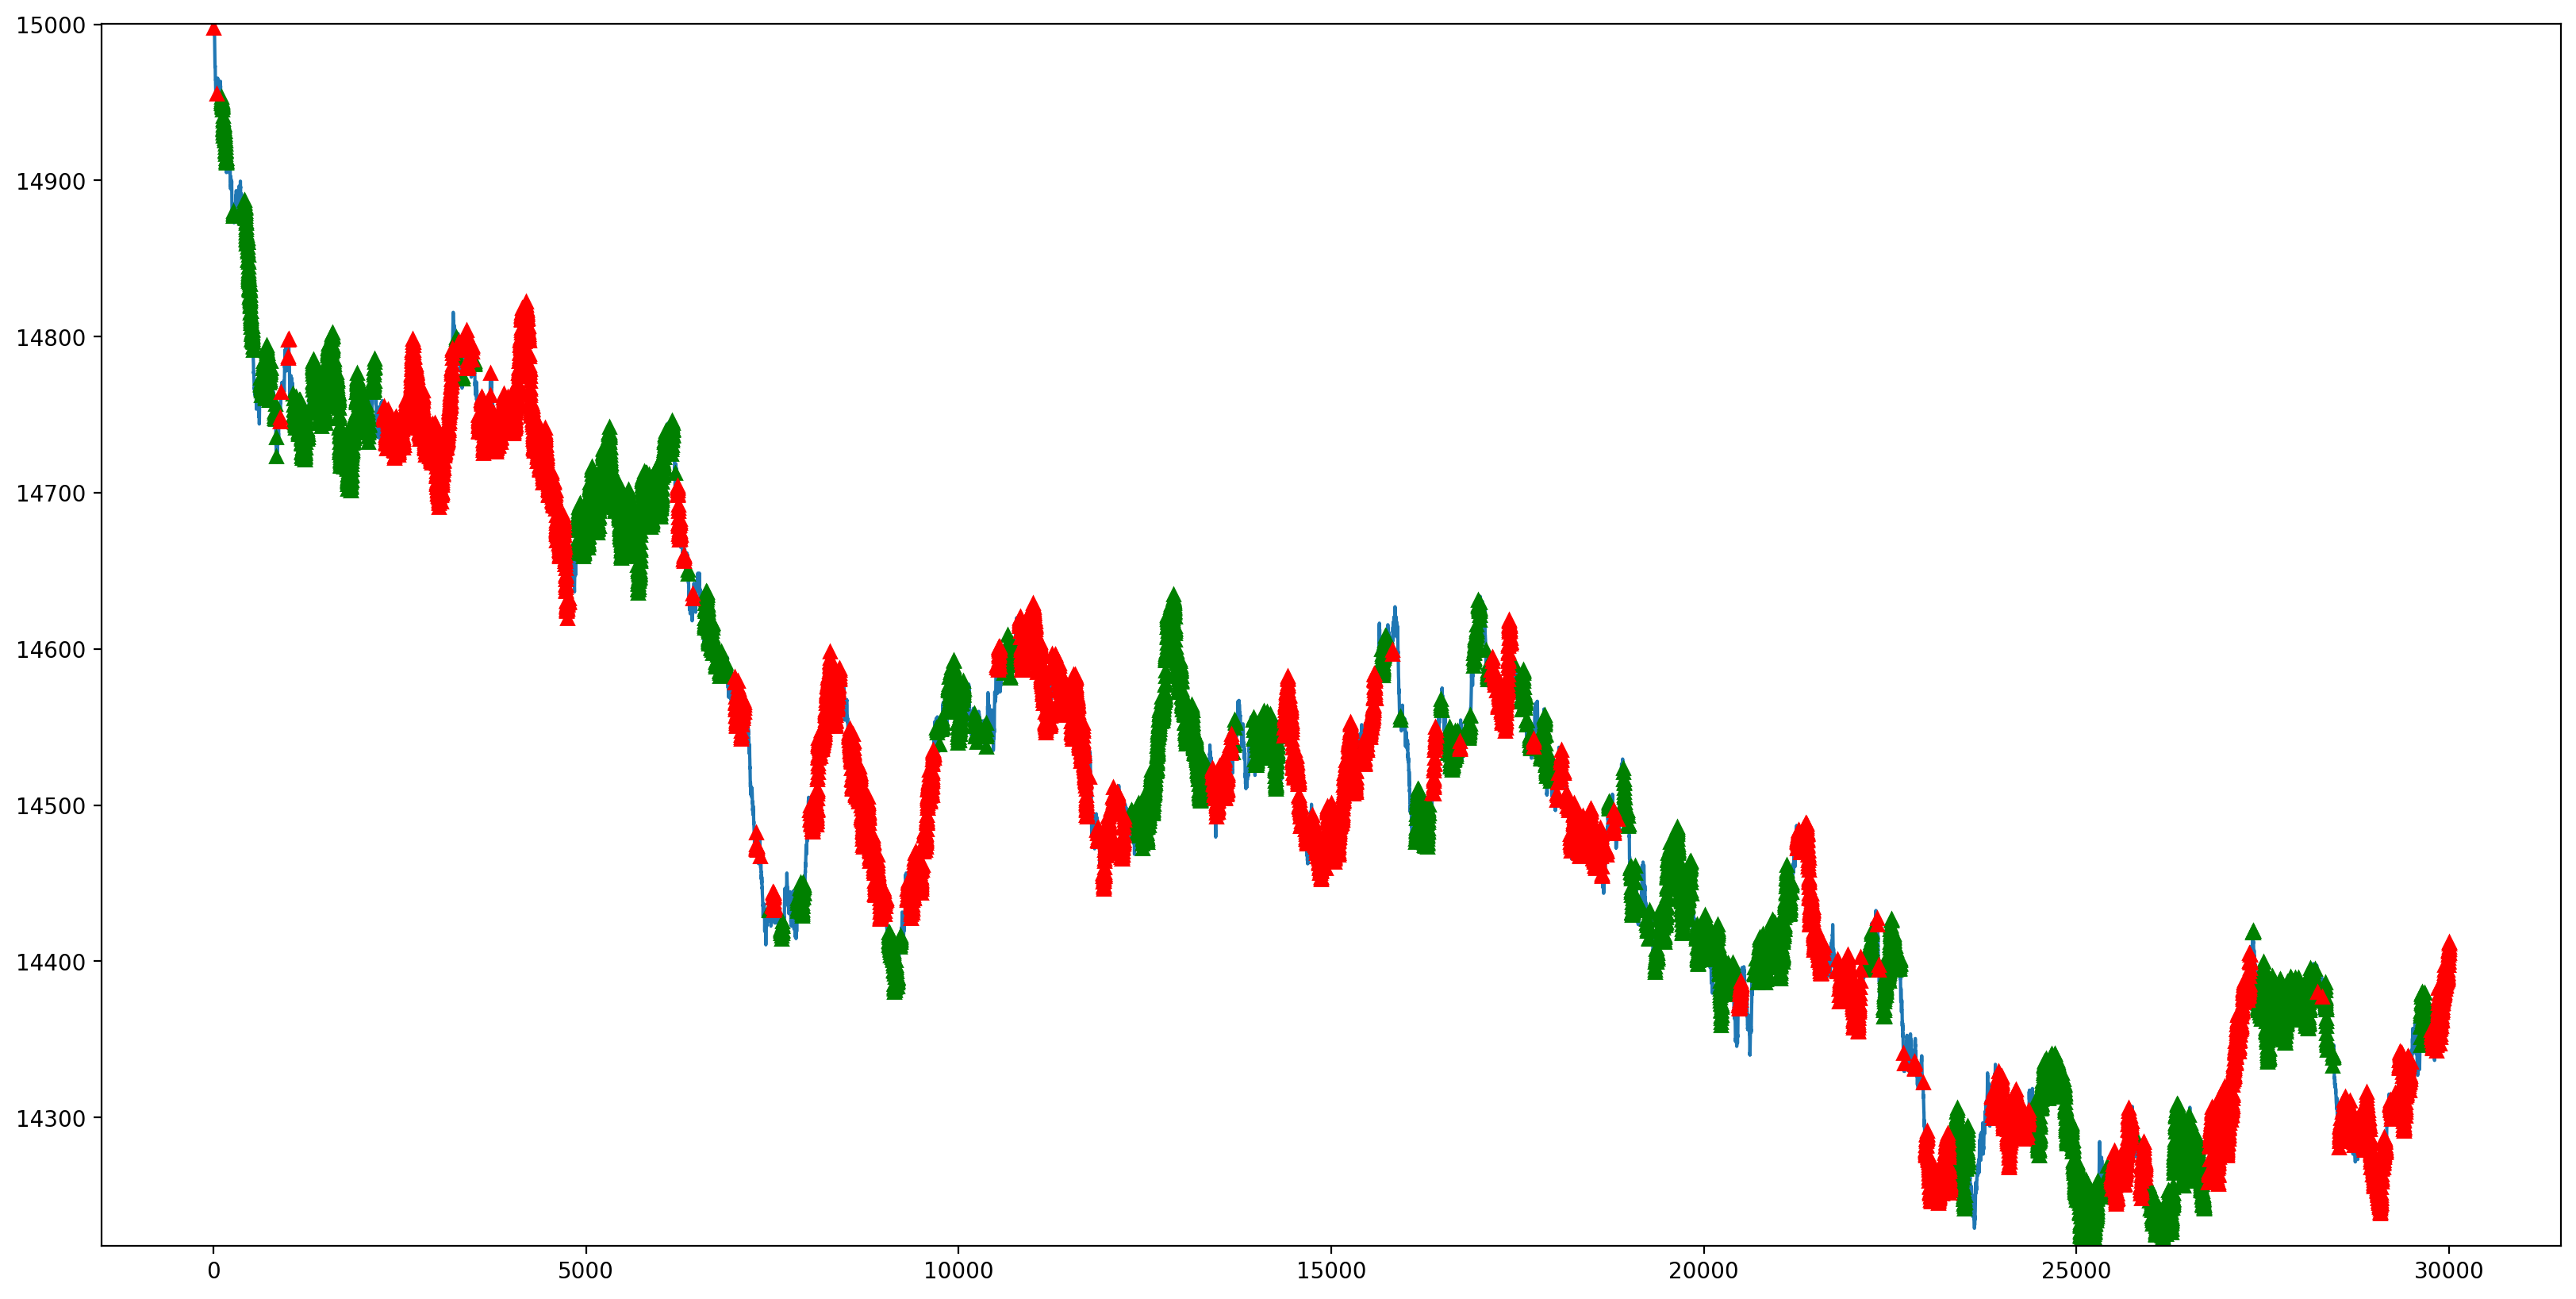

In [145]:
buy_bundle_signal = np.where(bundle_ts>-379.4904833333333+(76.42310842343223*0.5),1,0)
sell_bundle_signal = np.where(bundle_ts<-379.4904833333333-(76.42310842343223*0.5),-1,0)
rose_buy = np.where(sell_bundle_signal==-1, rose, 0)
rose_sell = np.where(buy_bundle_signal==1, rose, 0)

plt.figure(figsize=(20,10),dpi=200)
rose.plot()
pd.Series(rose_buy).plot(color='g',linestyle='None', marker='^')
pd.Series(rose_sell).plot(color='r',linestyle='None', marker='^')
x1,x2,y1,y1 = plt.axis()
plt.axis((x1,x2,rose.min(), rose.max()))

<Axes: >

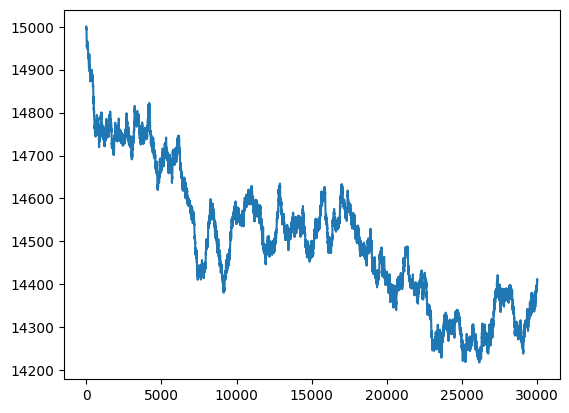

In [81]:
choco.plot()

In [74]:
manual_rose = basket - choco*4 - strawberry*6

In [86]:
(manual_rose - rose).mean()

379.4904833333333

In [69]:
manual_rose = -basket + choco*4 + strawberry*6

<Axes: >

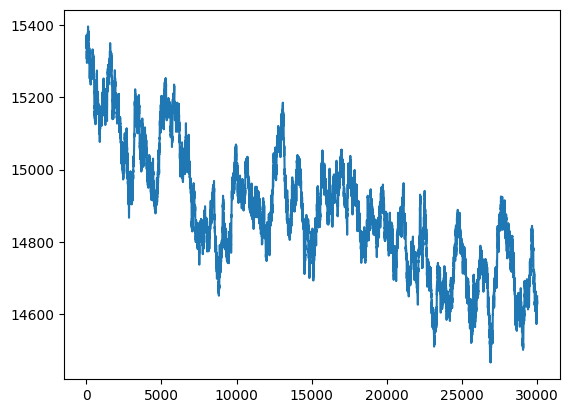

In [75]:
manual_rose.plot()

In [72]:
manual_choco = (-basket + strawberry*6 + rose)/4

<Axes: >

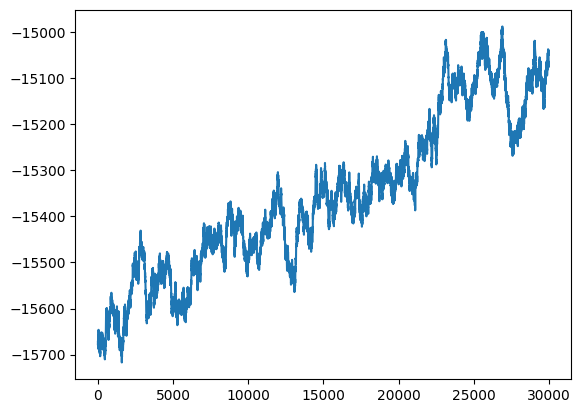

In [73]:
manual_choco.plot()

In [51]:
np.std(manual_basket-basket)

76.42310842343223

# Pairs

In [161]:
from statsmodels.tsa.stattools import adfuller
ratio = rose/choco
result = adfuller(ratio)
# Extract the test statistic and p-value from the result
test_statistic = result[0]
p_value = result[1]
p_value

0.012781205783048394

In [ ]:
ratio = rose/choco

In [163]:
ratio.std()

0.012955391130802825

In [173]:
choco_rose_product = (choco*2 - rose)
result = adfuller(choco_rose_product)
test_statistic = result[0]
p_value = result[1]
p_value

0.03494851033106694

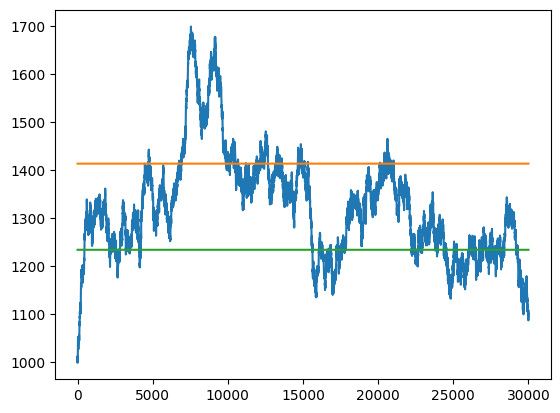

In [175]:
fig, ax1 = plt.subplots()

plt.plot(choco_rose_product)
plt.plot(range(30000), [choco_rose_product.mean()+(choco_rose_product.std()*0.8)]*30000)
plt.plot(range(30000), [choco_rose_product.mean()-(choco_rose_product.std()*0.8)]*30000)

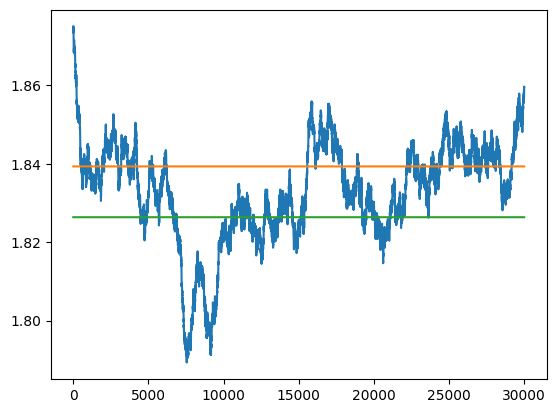

In [165]:
fig, ax1 = plt.subplots()

plt.plot(ratio)
plt.plot(range(30000), [ratio.mean()+(ratio.std()*0.5)]*30000)
plt.plot(range(30000), [ratio.mean()-(ratio.std()*0.5)]*30000)

<Axes: >

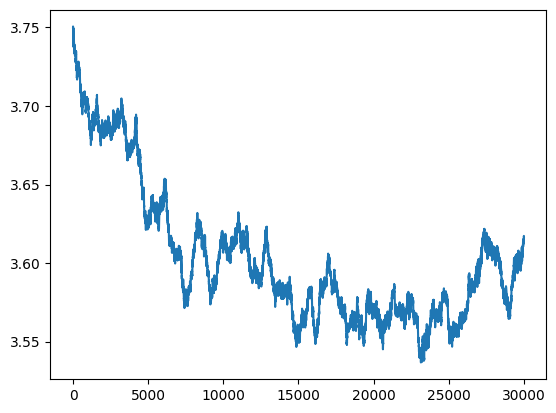

In [150]:
(rose/strawberry).plot()

<Axes: >

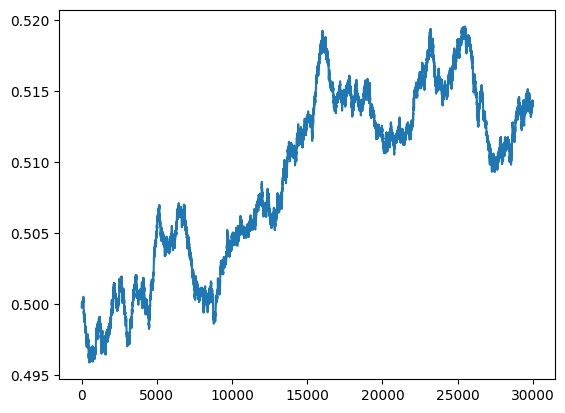

In [151]:
(strawberry/choco).plot()

<Axes: >

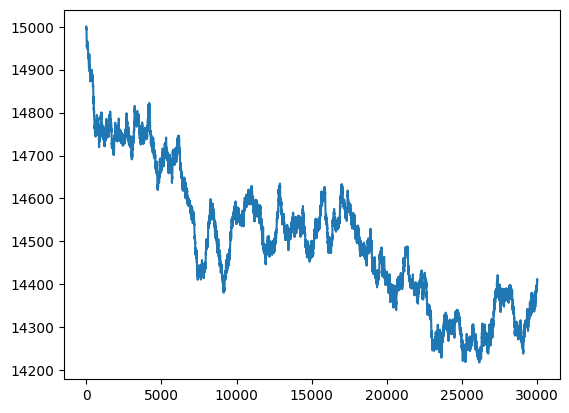

In [179]:
rose.plot()

<Axes: >

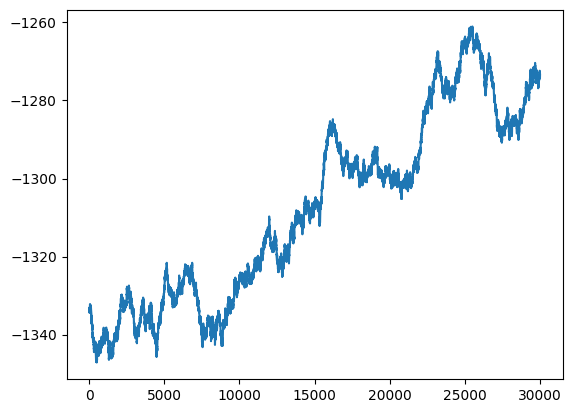

In [191]:
((strawberry/6) - (choco/4)).plot()

In [202]:
result = adfuller(strawberry)

In [203]:
result[1]

0.7765507915208347